In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np 
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score
from sklearn import tree
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import pickle

In [82]:
#Load the Data

df = pd.read_csv("/Users/greivinarias/OneDrive/Data Analytics/Tema 5/Task 4/2016-17_teamBoxScore.csv", header = 0)
df.head()

,gmDate,gmTime,seasTyp,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,teamAbbr,...,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace
0,2016-10-25,08:00,Regular,Lane,Karl,Adams,Bennie,Kennedy,Bill,NY,...,84.9585,116.5653,87.6731,28.8922,0.4592,20.8951,2.0667,80.0000,100.3729,100.3729
1,2016-10-25,08:00,Regular,Lane,Karl,Adams,Bennie,Kennedy,Bill,CLE,...,41.6667,87.6731,116.5653,-28.8922,0.3478,12.9969,0.9444,33.3333,100.3729,99.9564
2,2016-10-25,10:00,Regular,Buchert,Nick,Callahan,Mike,Brown,Tony,UTA,...,69.6653,122.1120,112.3863,9.7257,0.4699,18.3824,1.6923,38.4615,92.5380,92.1540
3,2016-10-25,10:00,Regular,Buchert,Nick,Callahan,Mike,Brown,Tony,POR,...,58.7137,112.3863,122.1120,-9.7257,0.4444,15.5687,1.3571,64.2857,92.5380,92.9252
4,2016-10-25,10:30,Regular,Maddox,Tre,Fraher,Pat,Crawford,Dan,SA,...,60.7884,101.2387,130.5979,-29.3592,0.4301,18.0560,1.5000,68.7500,98.7765,98.7765


In [83]:
df.tail()

,gmDate,gmTime,seasTyp,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,teamAbbr,...,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace
2455,2017-04-12,10:30,Regular,Williams,James,Garretson,Ron,Ayotte,Mark,GS,...,51.0504,90.6779,105.1478,-14.4699,0.4100,16.4098,1.2778,72.2222,103.6636,104.0973
2456,2017-04-12,10:30,Regular,Lane,Karl,Wall,Scott,Spooner,Bill,SAC,...,86.2033,129.7661,107.1981,22.5680,0.5513,22.4806,4.8333,66.6667,88.6210,88.6210
2457,2017-04-12,10:30,Regular,Lane,Karl,Wall,Scott,Spooner,Bill,LAC,...,57.0833,107.1981,129.7661,-22.5680,0.4706,21.5724,2.4545,18.1818,88.6210,88.2533
2458,2017-04-12,10:30,Regular,Guthrie,David,Adams,Bennie,Davis,Marc,NO,...,57.1875,100.9166,103.9441,-3.0275,0.4271,15.9744,0.8800,16.0000,99.0917,98.6805
2459,2017-04-12,10:30,Regular,Guthrie,David,Adams,Bennie,Davis,Marc,POR,...,65.0415,103.9441,100.9166,3.0275,0.4444,15.3563,1.8182,118.1818,99.0917,99.0917


In [84]:
df.shape

(2460, 123)

In [85]:
df.columns

Index(['gmDate', 'gmTime', 'seasTyp', 'offLNm1', 'offFNm1', 'offLNm2',
       'offFNm2', 'offLNm3', 'offFNm3', 'teamAbbr',
       ...
       'opptFIC40', 'opptOrtg', 'opptDrtg', 'opptEDiff', 'opptPlay%', 'opptAR',
       'opptAST/TO', 'opptSTL/TO', 'poss', 'pace'],
      dtype='object', length=123)

In [86]:
df.isnull().sum().max()

0

In [87]:
df.describe()

,teamMin,teamDayOff,teamPTS,teamAST,teamTO,teamSTL,teamBLK,teamPF,teamFGA,teamFGM,...,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace
count,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,...,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000
mean,241.726423,1.713821,105.591057,22.626423,13.963008,7.714634,4.772358,19.898780,85.397967,39.049187,...,65.602944,108.892624,108.892624,0.000000,0.438181,17.024517,1.774878,59.529623,97.015479,96.327066
std,7.189213,1.103532,12.148609,5.239513,3.880150,2.899403,2.483006,4.239371,7.071338,4.956133,...,13.541500,11.377983,11.377983,14.544787,0.051243,3.303426,0.750945,28.839730,5.639101,4.922166
min,237.000000,0.000000,64.000000,7.000000,3.000000,1.000000,0.000000,8.000000,62.000000,21.000000,...,22.510400,71.812400,71.812400,-54.076500,0.261900,5.882400,0.450000,5.000000,81.981000,81.640800
25%,240.000000,1.000000,97.000000,19.000000,11.000000,6.000000,3.000000,17.000000,81.000000,36.000000,...,56.458300,101.387950,101.387950,-9.372675,0.402550,14.792900,1.263200,40.000000,93.176600,92.867200
50%,240.000000,2.000000,106.000000,22.000000,14.000000,8.000000,4.000000,20.000000,85.000000,39.000000,...,64.937800,108.969150,108.969150,0.000000,0.438200,17.067400,1.636400,54.545500,96.542750,96.054950
75%,241.000000,2.000000,114.000000,26.000000,16.000000,9.000000,6.000000,23.000000,90.000000,42.000000,...,74.508450,116.552100,116.552100,9.372675,0.472500,19.194250,2.090900,73.333300,100.498800,99.662075
max,341.000000,9.000000,149.000000,47.000000,29.000000,20.000000,15.000000,39.000000,128.000000,57.000000,...,123.319300,147.231600,147.231600,54.076500,0.606400,29.671700,8.333300,266.666700,130.761500,113.266900


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Columns: 123 entries, gmDate to pace
dtypes: float64(50), int64(54), object(19)
memory usage: 2.3+ MB


In [89]:
#Check missing Data

total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,pace,team3P%,teamFTM,teamFT%,teamORB,teamDRB,teamTRB,teamPTS1,teamPTS2,teamPTS3,...,oppt2PA,oppt2PM,oppt2P%,oppt3PA,oppt3PM,oppt3P%,opptFTA,opptFTM,opptFT%,gmDate
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


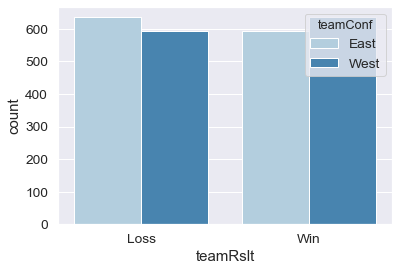

In [223]:
ax1= sns.countplot(x="teamRslt", hue="teamConf", data=df, palette="Blues")

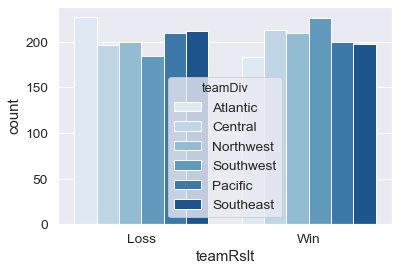

In [224]:
ax2 = sns.countplot(x="teamRslt", hue="teamDiv", data=df, palette="Blues")

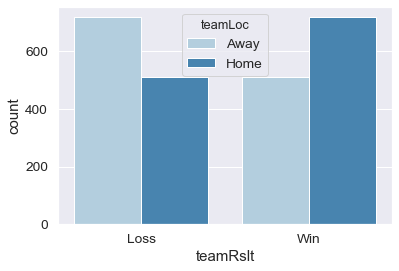

In [225]:
ax3 = sns.countplot(x="teamRslt", hue="teamLoc", data=df, palette="Blues")

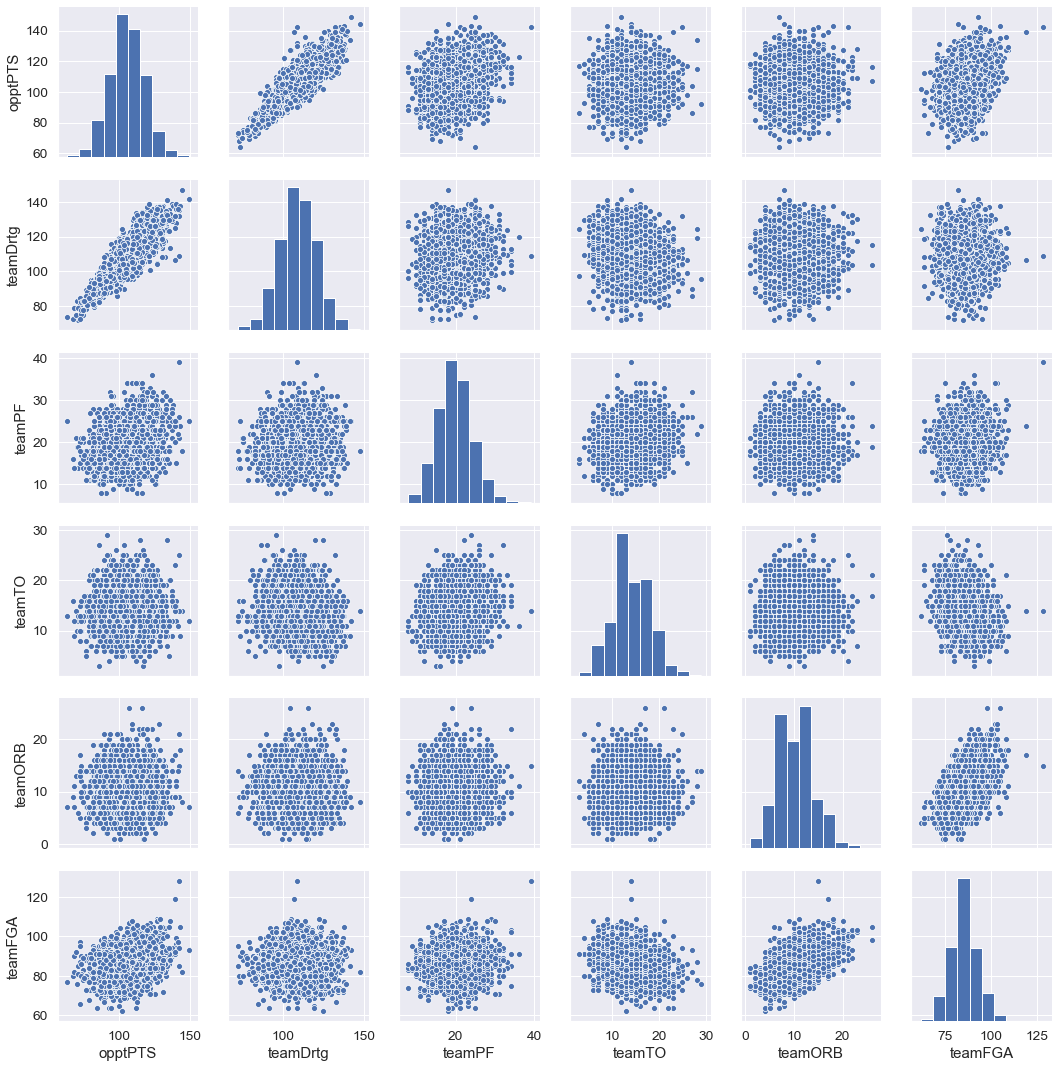

In [226]:
#Scatter Plots

cols1 = ['opptPTS', 'teamDrtg', 'teamPF', 'teamTO', 'teamORB', 'teamFGA']
sns.pairplot(df[cols1], size=2.5)
plt.show()

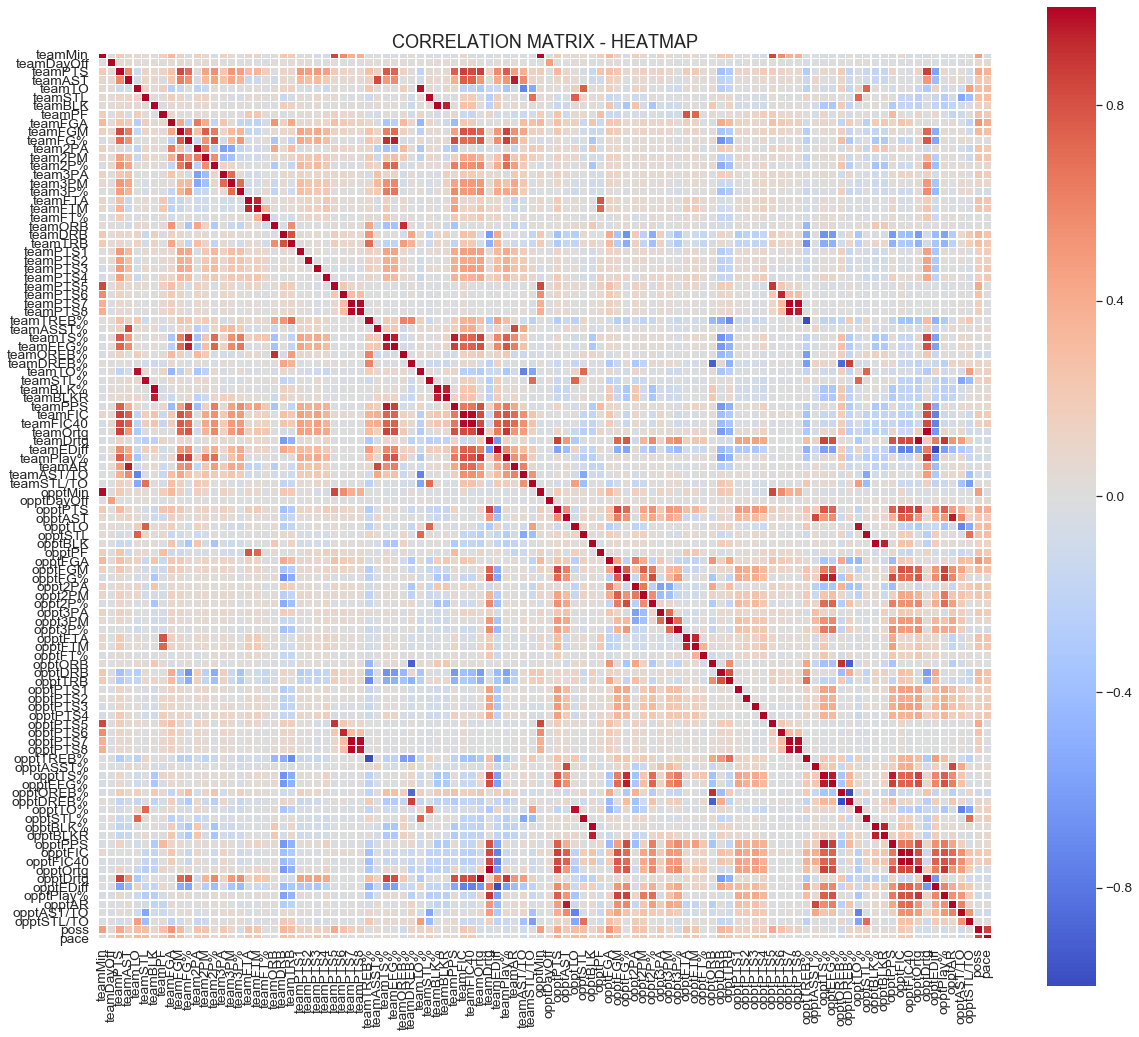

In [90]:
#Find correlations

corr = df.corr()
f, ax = plt.subplots(figsize=(20,18))
sns.heatmap(corr, cbar = True,  square = True, annot = False, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax)
plt.title('CORRELATION MATRIX - HEATMAP', size=18);

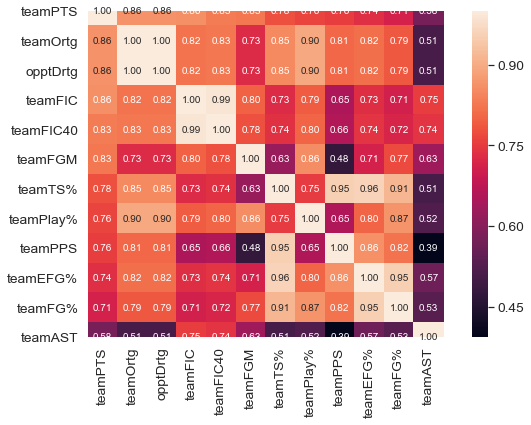

In [91]:
#Team Points

k = 12
cols = corr.nlargest(k, 'teamPTS')['teamPTS'].index
f, ax = plt.subplots(figsize=(10,6))
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

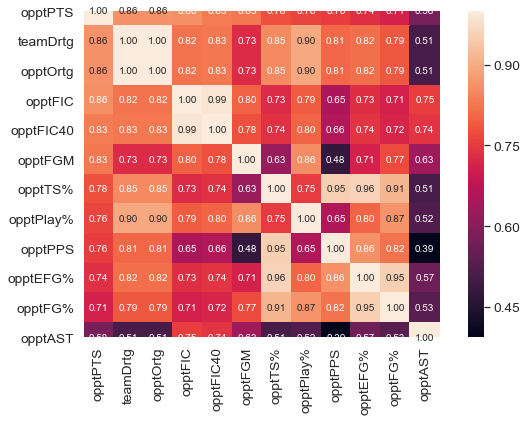

In [92]:
#Opponent Points

k = 12
cols = corr.nlargest(k, 'opptPTS')['opptPTS'].index
f, ax = plt.subplots(figsize=(10,6))
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

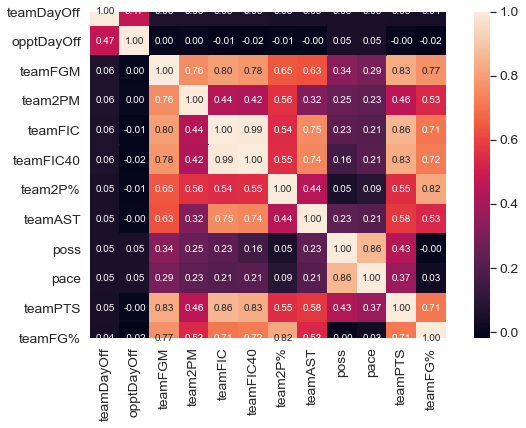

In [93]:
# Team Days off

k = 12
cols = corr.nlargest(k, 'teamDayOff')['teamDayOff'].index
f, ax = plt.subplots(figsize=(10,6))
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

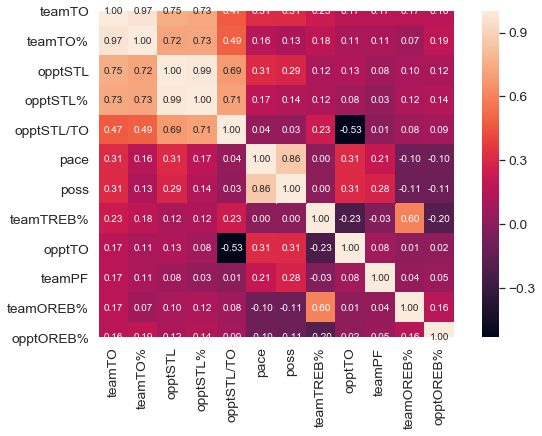

In [94]:
# Team Turnovers

k = 12
cols = corr.nlargest(k, 'teamTO')['teamTO'].index
f, ax = plt.subplots(figsize=(10,6))
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [99]:
#Prepare X and Y

feature_cols = ['opptPTS', 'teamDrtg', 'teamPF', 'teamTO', 'teamORB', 'teamFGA']
x = df[feature_cols]
y = df['teamRslt']
x.head()

,opptPTS,teamDrtg,teamPF,teamTO,teamORB,teamFGA
0,117,116.5653,22,18,13,87
1,88,87.6731,22,15,11,94
2,113,122.1120,19,14,6,82
3,104,112.3863,18,13,5,75
4,100,101.2387,19,14,21,98


In [105]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.4, random_state=2)

In [106]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1476, 6)
(984, 6)
(1476,)
(984,)


Accuracy: 0.6991869918699187
[[1.  0. ]
 [1.  0. ]
 [0.6 0.4]
 ...
 [0.6 0.4]
 [0.2 0.8]
 [0.4 0.6]]


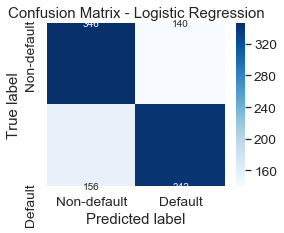

In [208]:
#KNN

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
knna = metrics.accuracy_score(y_test, pred)
print('Accuracy:', metrics.accuracy_score(y_test, pred))
print(knn.predict_proba(x_test))

## 5-fold cross-validation 
cv_scores =cross_val_score(knn, x, y, cv=5)

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,knn.predict(x_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression");

[[-0.02801593 -0.01644087  0.00895487  0.00334711 -0.04455365  0.04194433]]
[0.59606759]
Accuracy: 0.5467479674796748


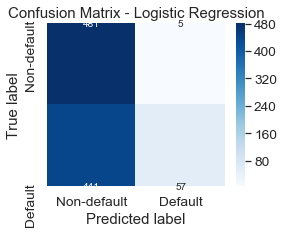

In [210]:
#Linear SVM

svm = LinearSVC(random_state=2)
svm.fit(x_train, y_train)
print(svm.coef_)
print(svm.intercept_)
pred = svm.predict(x_test)
svma = metrics.accuracy_score(y_test, pred)
print('Accuracy:', metrics.accuracy_score(y_test, pred))

## 5-fold cross-validation 
cv_scores =cross_val_score(svm, x, y, cv=5)

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,svm.predict(x_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression");

Accuracy: 0.717479674796748


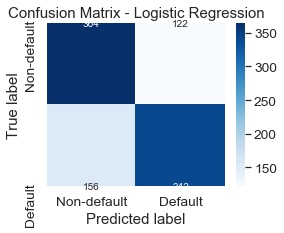

In [211]:
#Random Forrest

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
rfa = metrics.accuracy_score(y_test, pred)
print('Accuracy:', metrics.accuracy_score(y_test, pred))

## 5-fold cross-validation 
cv_scores =cross_val_score(knn, x, y, cv=5)

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,rf.predict(x_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression");

In [147]:
print(rf.feature_importances_)

[0.19776966 0.35461142 0.11399681 0.11603508 0.10293692 0.11465012]


Accuracy: 0.75


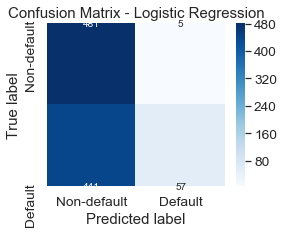

In [212]:
# Gradient Treee Boosting

gtb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(x_train, y_train)
gtb.score(x_test, y_test)
pred = gtb.predict(x_test)
gtba = metrics.accuracy_score(y_test, pred)
print('Accuracy:', metrics.accuracy_score(y_test, pred))

## 5-fold cross-validation 
cv_scores =cross_val_score(knn, x, y, cv=5)

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,svm.predict(x_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression");

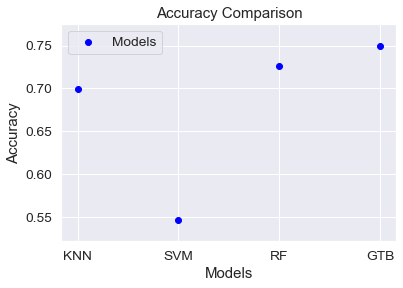

In [203]:
#Accuracy Comparison

x_data = 'KNN', 'SVM', 'RF', 'GTB'
y_data = [knna, svma, rfa, gtba]
legend = 

plt.scatter(x_data, y_data, c='blue', label='Models')
plt.title('Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

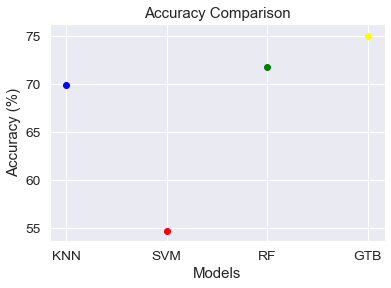

In [222]:
#Accuracy Comparison

x1 = 'KNN'
x2 = 'SVM'
x3 = 'RF'
x4 = 'GTB'
y1 = knna*100
y2 = svma*100
y3 = rfa *100
y4 = gtba*100

fig, ax = plt.subplots()
ax.scatter(x1, y1, color ='blue')
ax.scatter(x2, y2, color ='red')
ax.scatter(x3, y3, color ='green')
ax.scatter(x4, y4, color ='yellow')
plt.title('Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')

plt.show()

In [ ]:
#GTB is the most Accurate!

In [149]:
#Apply model to season 2017-2018

df2 = pd.read_csv("/Users/greivinarias/OneDrive/Data Analytics/Tema 5/Task 4/2017-18_teamBoxScore.csv")
df2.head()

,gmDate,gmTime,seasTyp,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,teamAbbr,...,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace
0,2017-10-17,08:00,Regular,Forte,Brian,Smith,Michael,McCutchen,Monty,BOS,...,55.5208,101.7143,98.7227,2.9916,0.4176,14.6154,1.1176,17.6471,100.2809,99.8648
1,2017-10-17,08:00,Regular,Forte,Brian,Smith,Michael,McCutchen,Monty,CLE,...,62.5519,98.7227,101.7143,-2.9916,0.3956,17.7778,2.0000,91.6667,100.2809,100.2809
2,2017-10-17,10:30,Regular,Maddox,Tre,Garretson,Ron,Foster,Scott,HOU,...,86.2033,118.0353,119.0108,-0.9755,0.4725,24.2442,2.0000,29.4118,102.5117,102.9406
3,2017-10-17,10:30,Regular,Maddox,Tre,Garretson,Ron,Foster,Scott,GS,...,81.9038,119.0108,118.0353,0.9755,0.4700,19.1309,2.1538,69.2308,102.5117,102.0863
4,2017-10-18,07:00,Regular,Davis,Marc,Boland,Matt,DeRosa,Joe,CHA,...,70.7113,103.0506,90.9270,12.1236,0.4271,17.8731,2.6667,155.5556,98.9805,99.8123


In [150]:
#Prepare X and Y

new_feature_cols = ['opptPTS', 'teamDrtg', 'teamPF', 'teamTO', 'teamORB', 'teamFGA']
x_new = df2[new_feature_cols]
y_new = df2['teamRslt']
x.head()

,opptPTS,teamDrtg,teamPF,teamTO,teamORB,teamFGA
0,117,116.5653,22,18,13,87
1,88,87.6731,22,15,11,94
2,113,122.1120,19,14,6,82
3,104,112.3863,18,13,5,75
4,100,101.2387,19,14,21,98


In [151]:
# Gradient Tree Boosting

gtb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(x, y)
gtb.score(x_new, y_new)
print('Accuracy:', metrics.accuracy_score(y_test, pred))

Accuracy: 0.75


In [152]:
#Use Gradient Tree

filename = 'nba_pred_modelv1.sav'
pickle.dump(gtb, open(filename, 'wb'))

In [153]:
#Game predictions for 1/5/18

#Games
games = ['PHX1 vs SAS2', 'DET1 vs PHI2', 'MIN1 vs BOS2', 'NY1 vs MIA2', 'TOR1 vs MIL2', 'CHI1 vs DAL2', 'UTA1 vs DEN2', 'WSH1 vs MEM2', 'ATL1 vs POR2', 'CHA1 vs LAL2']

g1 = [[101.3, 111.9, 22.3, 15.9, 11.3, 87.1]]
g2 = [[108.4, 106.7, 18.7, 14.4, 10.3, 86.0]]
g3 = [[103.4, 109.8, 18.0, 13.2, 10.3, 84.8]]
g4 = [[102.2, 108.0, 20.8, 15.3, 10.8, 86.0]]
g5 = [[105.9, 105.4, 22.1, 13.9, 9.4, 86.5]]
g6 = [[101.6, 108.7, 19.2, 13.8, 9.4, 88.6]]
g7 = [[107.9, 106.8, 20.1, 14.4, 8.4, 82.4]]
g8 = [[98.9, 106.4, 21.7, 13.7, 9.9, 86.1]]
g9 = [[102.5, 110.9, 19.7, 15.5, 9.5, 84.7]]
g10 = [[106.7, 107.4, 18.1, 13.1, 10.5, 86.4]]

In [154]:
nba_pred_modelv1 = pickle.load(open(filename, 'rb'))

In [155]:
pred1 = nba_pred_modelv1.predict(g1)
prob1 = nba_pred_modelv1.predict_proba(g1)
print(pred1)
print(prob1)

['Loss']
[[0.88402916 0.11597084]]


In [156]:
pred2 = nba_pred_modelv1.predict(g2)
prob2 = nba_pred_modelv1.predict_proba(g2)
print(pred2)
print(prob2)

['Win']
[[0.2520889 0.7479111]]


In [157]:
pred3 = nba_pred_modelv1.predict(g3)
prob3 = nba_pred_modelv1.predict_proba(g3)
print(pred3)
print(prob3)

['Win']
[[0.46306847 0.53693153]]


In [158]:
pred4 = nba_pred_modelv1.predict(g4)
prob4 = nba_pred_modelv1.predict_proba(g4)
print(pred4)
print(prob4)

['Loss']
[[0.68202806 0.31797194]]


In [159]:
pred5 = nba_pred_modelv1.predict(g5)
prob5 = nba_pred_modelv1.predict_proba(g5)
print(pred5)
print(prob5)

['Win']
[[0.30850135 0.69149865]]


In [160]:
pred6 = nba_pred_modelv1.predict(g6)
prob6 = nba_pred_modelv1.predict_proba(g6)
print(pred6)
print(prob6)

['Loss']
[[0.70652242 0.29347758]]


In [161]:
pred7 = nba_pred_modelv1.predict(g7)
prob7 = nba_pred_modelv1.predict_proba(g7)
print(pred7)
print(prob7)

['Win']
[[0.28306566 0.71693434]]


In [162]:
pred8 = nba_pred_modelv1.predict(g8)
prob8 = nba_pred_modelv1.predict_proba(g8)
print(pred8)
print(prob8)

['Win']
[[0.43575547 0.56424453]]


In [163]:
pred9 = nba_pred_modelv1.predict(g9)
prob9 = nba_pred_modelv1.predict_proba(g9)
print(pred9)
print(prob9)

['Loss']
[[0.81348106 0.18651894]]


In [164]:
pred10 = nba_pred_modelv1.predict(g10)
prob10 = nba_pred_modelv1.predict_proba(g10)
print(pred10)
print(prob10)

['Win']
[[0.39524915 0.60475085]]


In [165]:
d = {'Game': games, 'Prediction':[pred1, pred2, pred3, pred4, pred5, pred6, pred7, pred8, pred9, pred10], 'Probability (1, 2)': [prob1, prob2, prob3, prob4, prob5, prob6, prob7, prob8, prob9, prob10], 'Actual Result': ['Loss', 'Loss', 'Loss', 'Win', 'Win', 'Win', 'Loss', 'Win', 'Loss', 'Win']}
df3 = pd.DataFrame(data = d)
df3

,Game,Prediction,"Probability (1, 2)",Actual Result
0,PHX1 vs SAS2,[Loss],"[[0.8840291621293912, 0.11597083787060875]]",Loss
1,DET1 vs PHI2,[Win],"[[0.25208890051387756, 0.7479110994861224]]",Loss
2,MIN1 vs BOS2,[Win],"[[0.46306847225549297, 0.536931527744507]]",Loss
3,NY1 vs MIA2,[Loss],"[[0.6820280619873991, 0.31797193801260093]]",Win
4,TOR1 vs MIL2,[Win],"[[0.3085013481552008, 0.6914986518447992]]",Win
5,CHI1 vs DAL2,[Loss],"[[0.7065224206226016, 0.2934775793773984]]",Win
6,UTA1 vs DEN2,[Win],"[[0.28306565981611764, 0.7169343401838824]]",Loss
7,WSH1 vs MEM2,[Win],"[[0.43575546536083787, 0.5642445346391621]]",Win
8,ATL1 vs POR2,[Loss],"[[0.8134810587767533, 0.18651894122324675]]",Loss
9,CHA1 vs LAL2,[Win],"[[0.39524914555246426, 0.6047508544475357]]",Win
